## Read me before looking down.
This Notebook is how we calculate the statistic data for each model, if you are note interesting about this, just close it.

In [26]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from evaluate import mean_square_error
from evaluate import mean_absolute_error
from evaluate import mean_absolute_percentage_error
from evaluate import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('../../../documentation/data/DescriptorsDataset.csv')
X = data[['AXp-0d', 'AXp-1d', 'AXp-2d', 'ETA_eta_L', 'ETA_epsilon_3']].values
y = data[['e_gap_alpha']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1234)

In [6]:
eva=pd.DataFrame(columns= ['Error','Multiple Linear', 'Random Forest', 'Polynomial', 'Neural Network'])

In [49]:
eva['Error']=['MSE', 'MAE', 'MAPE', '$R^2$','Kfold']
eva

,Error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035795,0.050361,0.173221
1,MAE,0.165998,0.142503,0.172879,0.334963
2,MAPE,0.092812,0.079263,0.095950,0.188373
3,$R^2$,0.593371,0.677222,0.545867,0.566512
4,Kfold,0.590672,0.681907,0.590672,-0.062011


# Multiple Linear Regression

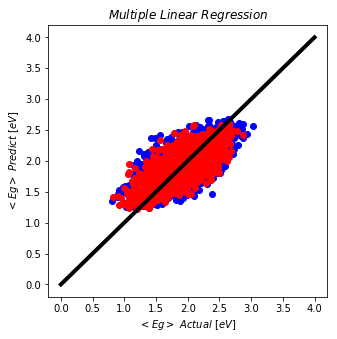

In [7]:
MLR = linear_model.LinearRegression()
MLR.fit(X_train,y_train)
ytest_Pred1 = MLR.predict(X_test)
ytrain_Pred1 = MLR.predict(X_train)
plt.figure(figsize=(5,5))
plt.scatter(y_train,ytrain_Pred1,color='blue')
plt.scatter(y_test,ytest_Pred1,color='r')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('$Multiple \ Linear \ Regression$')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')

plt.show()

In [8]:
scores = cross_val_score(MLR, X, y.ravel(), cv=10)
# K-fold   mean of scores
eva['Multiple Linear']=[mean_square_error(y_test,ytest_Pred1),
                        mean_absolute_error(y_test,ytest_Pred1),
                       mean_absolute_percentage_error(y_test,ytest_Pred1),
                       r2_score(y_test,ytest_Pred1),
                       np.mean(scores)]
eva

,Error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,NaN,NaN,NaN
1,MAE,0.165998,NaN,NaN,NaN
2,MAPE,0.092812,NaN,NaN,NaN
3,R2,0.593371,NaN,NaN,NaN
4,Kfold,0.590672,NaN,NaN,NaN


# Random Forest Regression

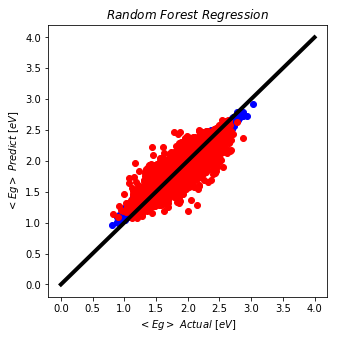

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train.ravel())

# Predicting a new result with the Random Forest Regression

ytrain_Pred2 = regressor.predict(X_train)
ytest_Pred2 = regressor.predict(X_test).reshape(-1,1)

# Visualising the Random Forest Regression results in higher resolution and smoother curve
plt.figure(figsize=(5,5))
plt.scatter(y_train,ytrain_Pred2, color = 'blue')
plt.scatter(y_test,ytest_Pred2, color = 'red')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('$Random \ Forest \ Regression$')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')
plt.show()

In [10]:
scores = cross_val_score(regressor, X, y.ravel(), cv=10)
# K-fold   mean of scores
eva['Random Forest']=[mean_square_error(y_test,ytest_Pred2),
                      mean_absolute_error(y_test,ytest_Pred2),
                      mean_absolute_percentage_error(y_test,ytest_Pred2),
                      r2_score(y_test,ytest_Pred2),
                      np.mean(scores)]
eva

,Error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035795,NaN,NaN
1,MAE,0.165998,0.142503,NaN,NaN
2,MAPE,0.092812,0.079263,NaN,NaN
3,R2,0.593371,0.677222,NaN,NaN
4,Kfold,0.590672,0.681907,NaN,NaN


# Polynomial Regression

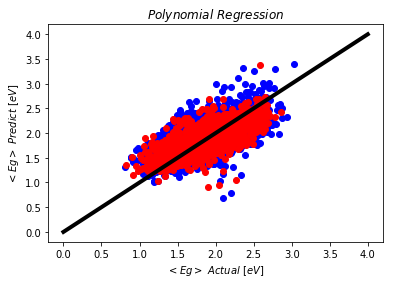

In [11]:
lin_reg = LinearRegression()
#lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Visualising the Polynomial Regression results
ytrain_Pred3 = lin_reg_2.predict(poly_reg.fit_transform(X_train))
ytest_Pred3 = lin_reg_2.predict(poly_reg.fit_transform(X_test))

plt.scatter(y_train,ytrain_Pred3, color = 'blue')
plt.scatter(y_test,ytest_Pred3, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('$Polynomial \ Regression$')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')

plt.show()

In [12]:
scores = cross_val_score(lin_reg_2, X, y.ravel(), cv=10)
# K-fold   mean of scores
eva['Polynomial']=[mean_square_error(y_test,ytest_Pred3),
                   mean_absolute_error(y_test,ytest_Pred3),
                   mean_absolute_percentage_error(y_test,ytest_Pred3),
                   r2_score(y_test,ytest_Pred3),
                   np.mean(scores)]
eva

,Error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035795,0.050361,NaN
1,MAE,0.165998,0.142503,0.172879,NaN
2,MAPE,0.092812,0.079263,0.095950,NaN
3,R2,0.593371,0.677222,0.545867,NaN
4,Kfold,0.590672,0.681907,0.590672,NaN


# Neural Network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

%matplotlib inline

Using TensorFlow backend.


In [34]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train)
X_test_scaler = StandardScaler().fit(X_test)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train)
X_test = X_test_scaler.transform(X_test)

In [35]:
from keras import regularizers

def neural_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(8, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    #model.add(Dense(4, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [36]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(1234)
# create the NN framework
estimator = KerasRegressor(build_fn=neural_model,
        epochs=1200, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=1200, 
        batch_size=10000, verbose=0)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.06 and for validation is 0.06


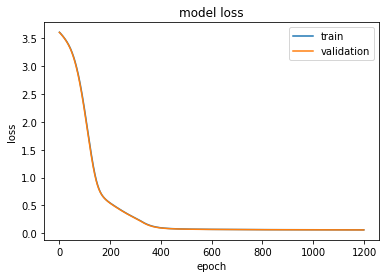

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

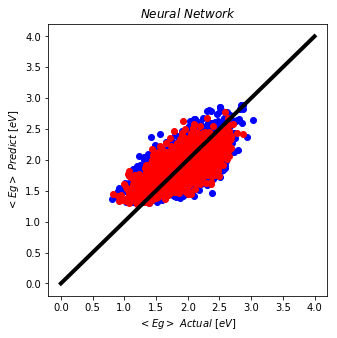

In [38]:
plt.figure(figsize=(5,5))
ytrain_Pred4 = estimator.predict(X_train)
ytest_Pred4 = estimator.predict(X_test)
plt.scatter(y_train,ytrain_Pred4, color = 'blue')
plt.scatter(y_test,ytest_Pred4, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('$Neural \ Network$')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')
plt.show()

In [48]:
Xst=StandardScaler().fit(X)
Xstand = Xst.transform(X)
scores = cross_val_score(estimator, Xstand, y.ravel(), cv=10)
# K-fold   mean of scores
eva['Neural Network']=[mean_square_error(y_test,ytest_Pred4),
                        mean_absolute_error(y_test,ytest_Pred4),
                       mean_absolute_percentage_error(y_test,ytest_Pred4),
                       r2_score(y_test,ytest_Pred4),
                      np.mean(scores)]
eva

,Error,Multiple Linear,Random Forest,Polynomial,Neural Network
0,MSE,0.045093,0.035795,0.050361,0.173221
1,MAE,0.165998,0.142503,0.172879,0.334963
2,MAPE,0.092812,0.079263,0.095950,0.188373
3,$R^2$,0.593371,0.677222,0.545867,0.566512
4,Kfold,0.590672,0.681907,0.590672,-0.062011


# Visualization

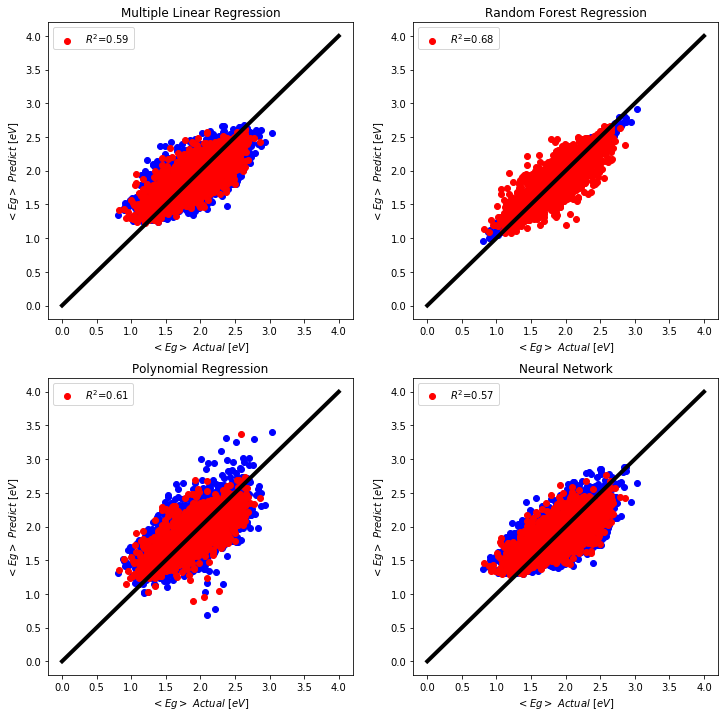

In [50]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot(2,2,1)
plt.scatter(y_train,ytrain_Pred1,color='blue')
plt.scatter(y_test,ytest_Pred1,color='r',label='$R^2$=0.59')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Multiple Linear Regression')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')
plt.legend(loc='upper left')

ax2 = plt.subplot(2,2,2)
plt.scatter(y_train,ytrain_Pred2, color = 'blue')
plt.scatter(y_test,ytest_Pred2, color = 'red',label='$R^2$=0.68')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Random Forest Regression')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')
plt.legend(loc='upper left')

ax3 = plt.subplot(2,2,3)
plt.scatter(y_train,ytrain_Pred3, color = 'blue')
plt.scatter(y_test,ytest_Pred3, color = 'red',label='$R^2$=0.61')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Polynomial Regression')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')
plt.legend(loc='upper left')
            
ax4 = plt.subplot(2,2,4)
prediction = estimator.predict(X_test)
plt.scatter(y_train,ytrain_Pred4, color = 'blue')
plt.scatter(y_test,ytest_Pred4, color = 'red',label='$R^2$=0.57')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Neural Network')
plt.xlabel('$<Eg> \ Actual \ [eV]$')
plt.ylabel('$<Eg> \ Predict \ [eV]$')
plt.legend(loc='upper left')
plt.savefig('Model_Comparison.png')
plt.show()

In [76]:
import csv
with open("Error_Comparison.csv","w",newline="") as datacsv:
    
    csvwriter = csv.writer(datacsv,dialect = ("excel"))
    csvwriter.writerow(eva)
    csvwriter.writerow(eva.loc[0])    
    csvwriter.writerow(eva.loc[1])
    csvwriter.writerow(eva.loc[2])
    csvwriter.writerow(eva.loc[3])
    csvwriter.writerow(eva.loc[4])